# Learn: Residuals

Linear regression can be used for any set of data, but you will not always want to use it. Consider the following data set: 

|  x  |  y  |
| --- | --- |
| 1 | 2 |
| 2 | 4 |
| 3 | 8 |
| 4 | 16 |
| 5 | 32 |
| 6 | 64 |
| 7 | 128 |
| 8 | 256 |
| 9 | 512 |

Do you think the linear regression model will be a good fit? Let's try it out:


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     -143.4         51.4  



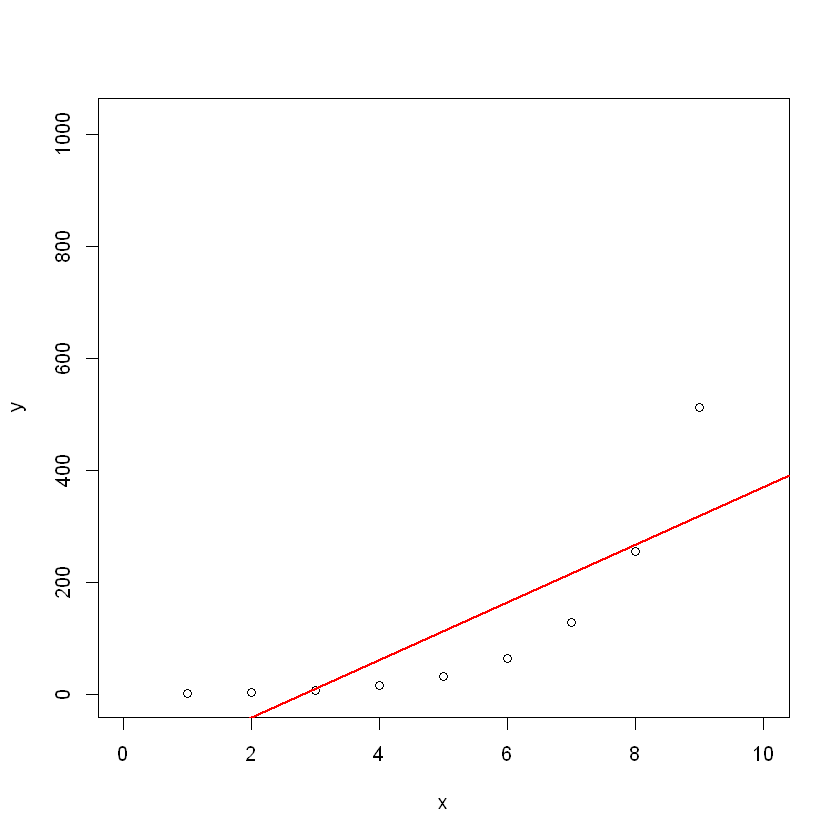

In [1]:
x <- c(1,2,3,4,5,6,7,8,9)
y <- c(2,4,8,16,32,64,128,256,512)
linear.model <- lm(y ~ x)
plot(x, y, xlim=c(0,10), ylim=c(0,1024))
abline(linear.model, col=2, lwd=2)
print(linear.model)

The linear regression model does not look like it fits the data very well. This would be a case where we would want to avoid using linear regression. Let's try a different model&mdash;a quadratic model.

In [2]:
quadratic.model <- lm(y ~ I(x ^ 2) + I(x))
print(quadratic.model)


Call:
lm(formula = y ~ I(x^2) + I(x))

Coefficients:
(Intercept)       I(x^2)         I(x)  
     116.95        14.20       -90.63  



*Note: We can't use `abline` since we are not plotting a line and I don't know of any better way of plotting the model. You could try `lines(fitted(quadratic.model))`, but it is not smooth, so it looks bad and doesn't represent the model as accurately.*

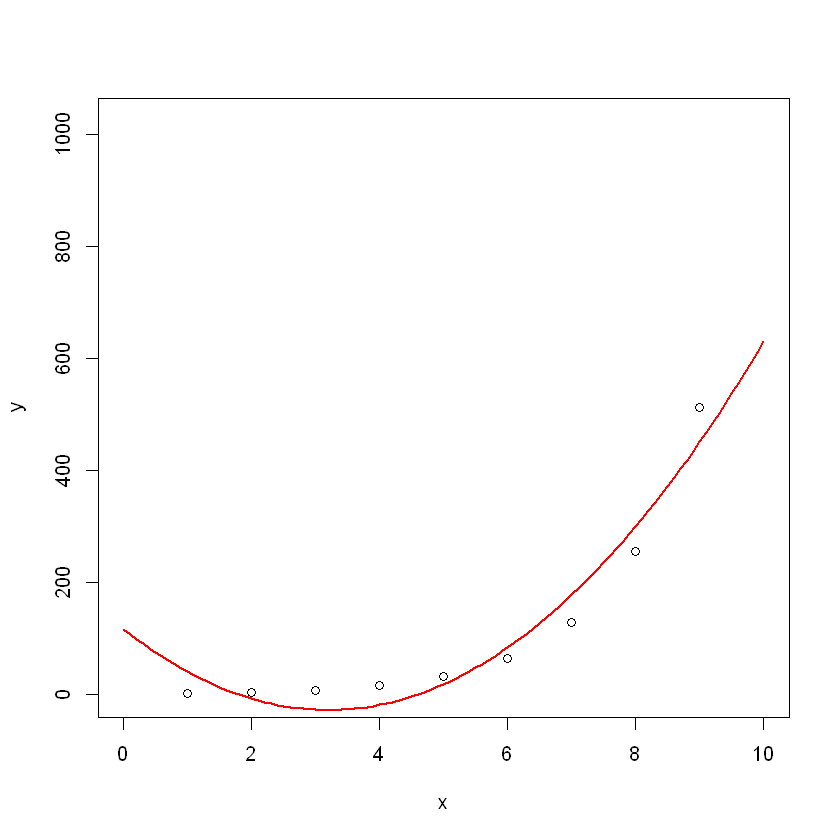

In [3]:
quadratic.model.function <- function (x) 116.95 - 90.63 * x + 14.20 * x ^ 2
plot(x, y, xlim=c(0,10), ylim=c(0,1024))
plot(quadratic.model.function, xlim=c(0,10), ylim=c(0,1024), col=2, lwd=2, add=T)

As you can see the quadratic model seems to fit the data much better! I think we can still do better than that...

In [4]:
cubic.model <- lm(y ~ I(x ^ 3) + I(x ^ 2) + I(x))
print(cubic.model)


Call:
lm(formula = y ~ I(x^3) + I(x^2) + I(x))

Coefficients:
(Intercept)       I(x^3)       I(x^2)         I(x)  
    -71.048        2.848      -28.524       89.390  



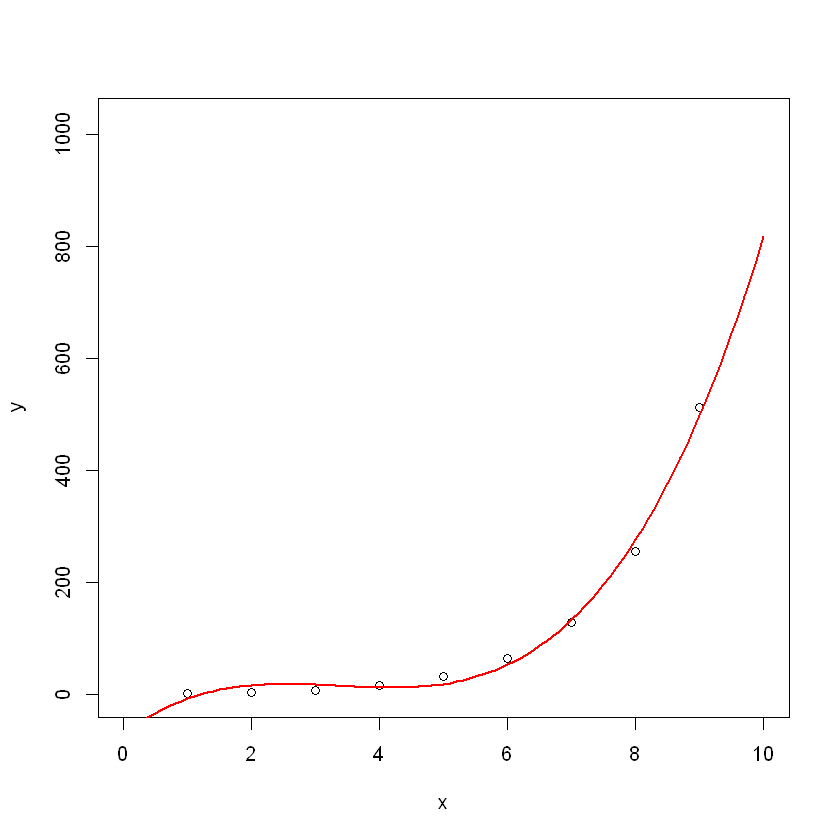

In [5]:
cubic.model.function <- function (x) -71.048 + 2.848 * x ^ 3 - 28.524 * x ^ 2 + 89.390 * x
plot(x, y, xlim=c(0,10), ylim=c(0,1024))
plot(cubic.model.function, xlim=c(0,10), ylim=c(0,1024), col=2, lwd=2, add=T)

Wow, look at that model. It fits so well. Could we get an even better model?

In [6]:
quartic.model <- lm(y ~ I(x ^ 4) + I(x ^ 3) + I(x ^ 2) + I(x))
print(quartic.model)


Call:
lm(formula = y ~ I(x^4) + I(x^3) + I(x^2) + I(x))

Coefficients:
(Intercept)       I(x^4)       I(x^3)       I(x^2)         I(x)  
    38.6667       0.4476      -6.1026      31.2564     -60.8601  



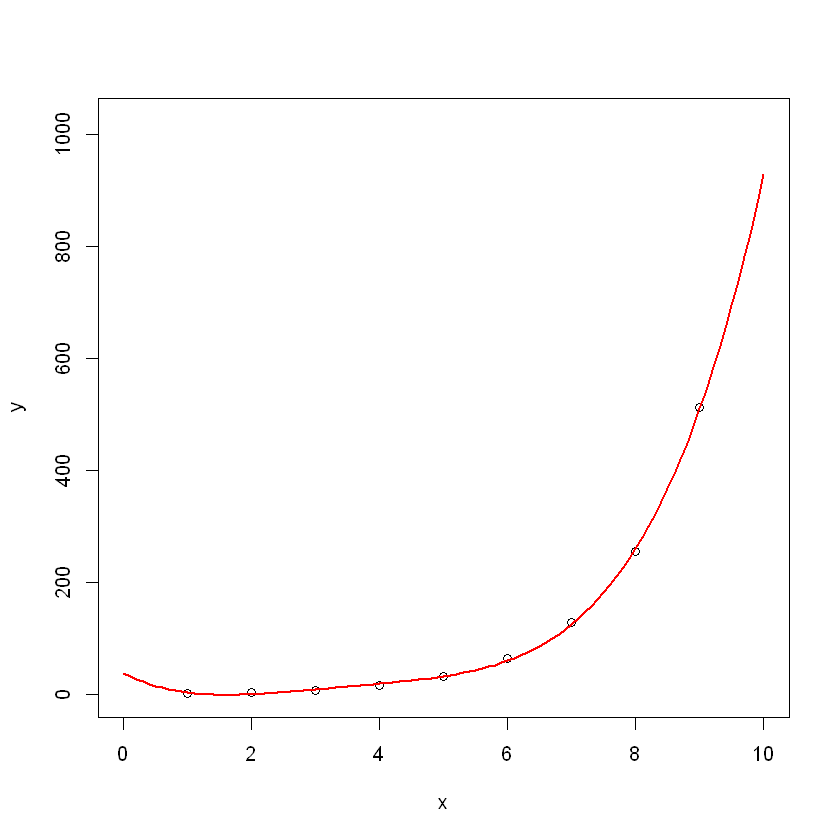

In [7]:
quartic.model.function <- function (x) 38.6667 + 0.4476 * x ^ 4 - 6.1026 * x ^ 3 + 31.2564 * x ^ 2 - 60.8601 * x
plot(x, y, xlim=c(0,10), ylim=c(0,1024))
plot(quartic.model.function, xlim=c(0,10), ylim=c(0,1024), col=2, lwd=2, add=T)

Okay, I think we may have [overfitted](https://en.wikipedia.org/wiki/Overfitting) the model. The quartic model is fitted too closely with the data, making it unreliable for predicting future observiations. So, in this case I would go with the cubic model.

## What have we learned?

- Linear regression is not always the best way to fit the data.
- There are higher degree regression models (e.g. quadratic, cubic, quartic).
- It is possible to overfit the data if you use too high of a degree for your regression model.